In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

/tmp/ipython-input-3506466213.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.get_cmap('plasma', len(classNames)), marker='o', s=20)


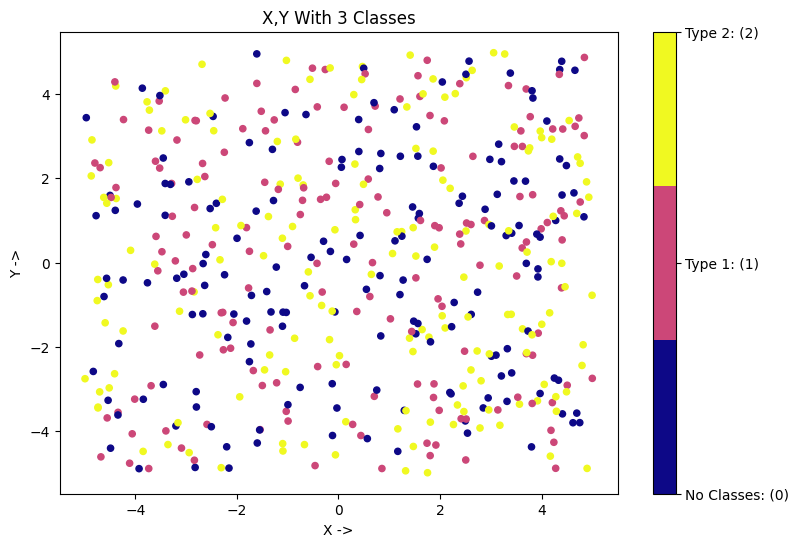

In [31]:
X = data[['X','Y']].values
Y = data['Class'].values


classNames = ['No Classes: (0)', 'Type 1: (1)', 'Type 2: (2)']
plt.figure(figsize=(9, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.get_cmap('plasma', len(classNames)), marker='o', s=20)
cbar = plt.colorbar(scatter, ticks=range(len(classNames)))
cbar.set_ticklabels(classNames[::1])
plt.title('X,Y With 3 Classes')
plt.xlabel('X ->')
plt.ylabel('Y ->')

plt.show()

In [30]:
data = pd.read_csv('/content/data.csv')
display(data.head())

,X,Y,Class
0,1.865716,2.643743,2
1,1.605102,3.941422,1
2,2.788231,-3.922283,2
3,-2.822778,3.372257,1
4,3.103362,-2.193965,0


In [32]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [34]:
class NeuralNetwork:
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 300
        hiddenLayerNeurons2 = 300
        hiddenLayerNeurons3 = 300
        outLayerNeurons = 3

        self.eta = 0.0000001

        self.Whl1 = np.random.randn(inputLayerNeurons,hiddenLayerNeurons1)
        self.Whl2 = np.random.randn(hiddenLayerNeurons1,hiddenLayerNeurons2)
        self.Whl3 = np.random.randn(hiddenLayerNeurons2,hiddenLayerNeurons3)
        self.WoH = np.random.randn(hiddenLayerNeurons3,outLayerNeurons)

        self.bH1 = np.zeros(hiddenLayerNeurons1)
        self.bH2 = np.zeros(hiddenLayerNeurons2)
        self.bH3 = np.zeros(hiddenLayerNeurons3)
        self.bO = np.zeros(outLayerNeurons)

    def relu(self,x,der=False):
        if der == True:
            return np.where(x>0,1,0)
        else :
            return np.maximum(0,x)

    def softmax(self,x):
        eX = np.exp(x - np.max(x,axis=1,keepdims=True))
        return eX / np.sum(eX,axis=1,keepdims=True)

    def feedForward(self, X):
        self.h1In = np.dot(X, self.Whl1) + self.bH1
        self.h1out = self.relu(self.h1In)

        self.h2In = np.dot(self.h1out,self.Whl2) + self.bH2
        self.h2out= self.relu(self.h2In)

        self.h3IN = np.dot(self.h2out,self.Whl3) + self.bH3
        self.h3out = self.relu(self.h3IN)

        self.outIN = np.dot(self.h3out,self.WoH) + self.bO
        pred = self.softmax(self.outIN)

        return pred

    def backPropagation(self,X,Y,pred):
        outErr = Y - pred
        outDelta = outErr

        h3Err = outDelta.dot(self.WoH.T)
        h3Delta = h3Err*self.relu(self.h3out,der=True)

        h2Err = h3Delta.dot(self.Whl3.T)
        h2Delta = h2Err*self.relu(self.h2out,der=True)

        h1Err = h2Delta.dot(self.Whl2.T)
        h1Delta = h1Err*self.relu(self.h1out,der=True)

        self.Whl1 += self.eta*X.T.dot(h1Delta)
        self.bH1 += self.eta*h1Delta.sum()

        self.Whl2 += self.eta*self.h1out.T.dot(h2Delta)
        self.bH2 += self.eta*h2Delta.sum()

        self.Whl3 += self.eta*self.h2out.T.dot(h3Delta)
        self.bH3 += self.eta*h3Delta.sum()

        self.WoH += self.eta*self.h3out.T.dot(outDelta)
        self.bO += self.eta*outDelta.sum()

    def train(self,X,Y):
        pred = self.feedForward(X)
        self.backPropagation(X,Y,pred)

In [35]:
yTrainEde = np.zeros((Y_train.size,3))
for i,l in enumerate(Y_train):
    yTrainEde[i,int(l)] = 1

In [36]:
nn = NeuralNetwork()

Epoch 0,Loss: 0.429969
Epoch 100,Loss: 0.407926
Epoch 200,Loss: 0.413333
Epoch 300,Loss: 0.366253
Epoch 400,Loss: 0.339941
Epoch 500,Loss: 0.396241
Epoch 600,Loss: 0.356823
Epoch 700,Loss: 0.388266
Epoch 800,Loss: 0.356032
Epoch 900,Loss: 0.401906


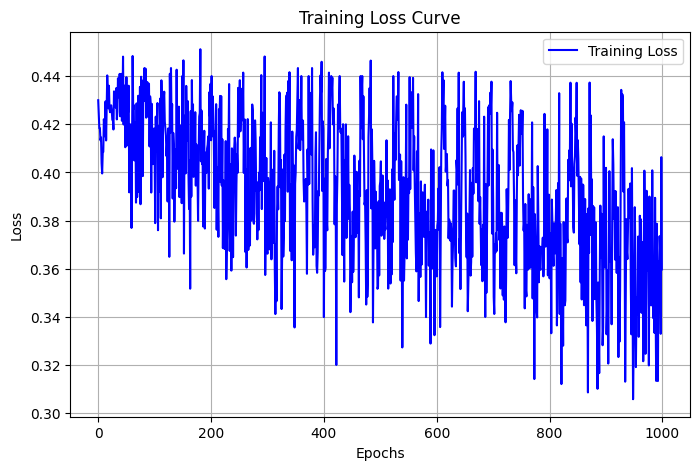

In [37]:
epochs = 1000
err = []

for epoch in range(epochs):
    nn.train(X_train,yTrainEde)

    loss = np.mean(np.square(yTrainEde - nn.feedForward(X_train)))
    err.append(loss)

    if epoch % 100 == 0 :
        print(f'Epoch {epoch},Loss: {loss:.6f}')

plt.figure(figsize=(8, 5))
plt.plot(err, label="Training Loss", color="blue")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-4276361024.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(xx,yy,Z,alpha=0.8,cmap=plt.cm.get_cmap('plasma',3))
/tmp/ipython-input-4276361024.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter = plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,edgecolors='k',marker='o',cmap=plt.cm.get_cmap('plasma',3))


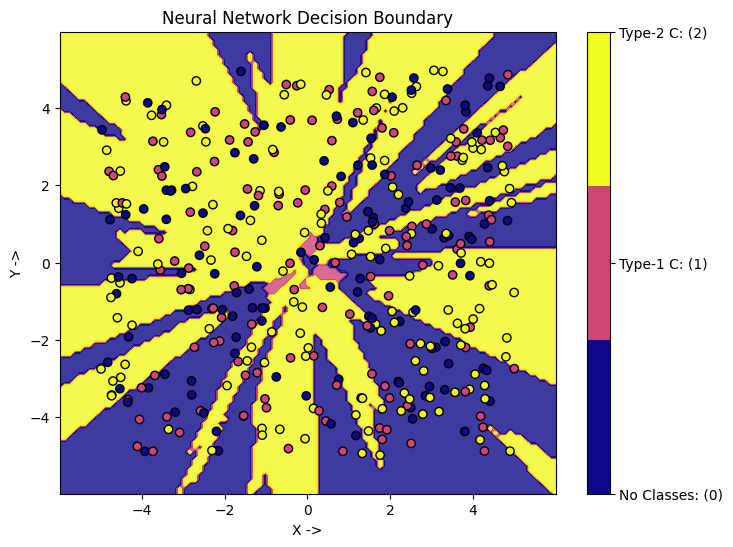

In [38]:
xMin,xMax = X[:,0].min()-1, X[:,0].max()+1
yMin,yMax = X[:,1].min()-1, X[:,1].max()+1
xx,yy = np.meshgrid(np.linspace(xMin,xMax,100),np.linspace(yMin,yMax,100))

Z = nn.feedForward(np.c_[xx.ravel(),yy.ravel()])
Z = np.argmax(Z,axis=1)
Z = Z.reshape(xx.shape)

classNames = ['No Classes: (0)','Type-1 C: (1)','Type-2 C: (2)']
plt.figure(figsize=(8,6))
plt.contourf(xx,yy,Z,alpha=0.8,cmap=plt.cm.get_cmap('plasma',3))
scatter = plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,edgecolors='k',marker='o',cmap=plt.cm.get_cmap('plasma',3))

cbar = plt.colorbar(scatter, ticks=range(3))
cbar.set_ticklabels(classNames[::1])

plt.title('Neural Network Decision Boundary')
plt.xlabel('X ->')
plt.ylabel('Y ->')
plt.show()